In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_mat = pd.read_csv('/Users/sahilkathuria/Downloads/ML-Projects/student/student-mat.csv', sep=';')

In [6]:
df_por = pd.read_csv('/Users/sahilkathuria/Downloads/ML-Projects/student/student-por.csv',sep=';')

In [7]:
df_por.head() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [8]:
df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

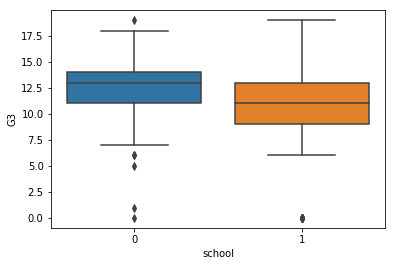

In [9]:
df_por['school']=pd.get_dummies(df_por['school'],drop_first=True)    #converting 0=GP and 1=MS
sns.boxplot(x='school',y='G3',data=df_por)

In [10]:
#hpw many of all the students are girls and boys
df_por['sex'].value_counts()

F    383
M    266
Name: sex, dtype: int64

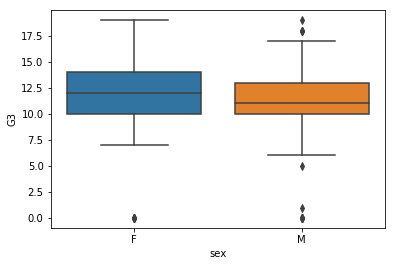

In [11]:
#performance of boys and girls
sns.boxplot(x='sex', y='G3', data=df_por)

In [12]:
df_por['age'].value_counts()

17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64

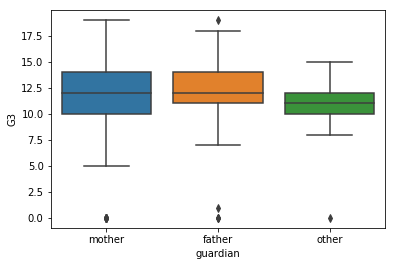

In [13]:
sns.boxplot(x='guardian', y='G3',data=df_por)

#students who have guardian other than their own parents scores average marks

In [14]:
df_por['studytime'].value_counts()

2    305
1    212
3     97
4     35
Name: studytime, dtype: int64

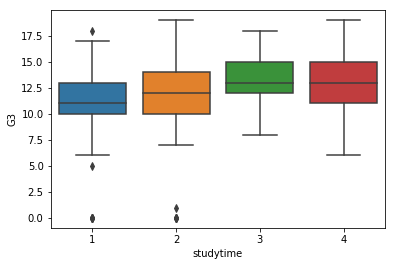

In [15]:
sns.boxplot(x='studytime', y='G3',data=df_por)

#weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

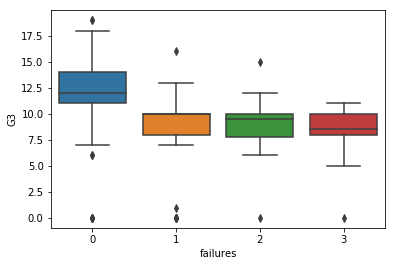

In [16]:
sns.boxplot(x='failures', y='G3', data=df_por)

In [17]:
df_por = pd.get_dummies(df_por,drop_first=True)

In [18]:
df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 42 columns):
school               649 non-null uint8
age                  649 non-null int64
Medu                 649 non-null int64
Fedu                 649 non-null int64
traveltime           649 non-null int64
studytime            649 non-null int64
failures             649 non-null int64
famrel               649 non-null int64
freetime             649 non-null int64
goout                649 non-null int64
Dalc                 649 non-null int64
Walc                 649 non-null int64
health               649 non-null int64
absences             649 non-null int64
G1                   649 non-null int64
G2                   649 non-null int64
G3                   649 non-null int64
sex_M                649 non-null uint8
address_U            649 non-null uint8
famsize_LE3          649 non-null uint8
Pstatus_T            649 non-null uint8
Mjob_health          649 non-null uint8
Mjob_other     

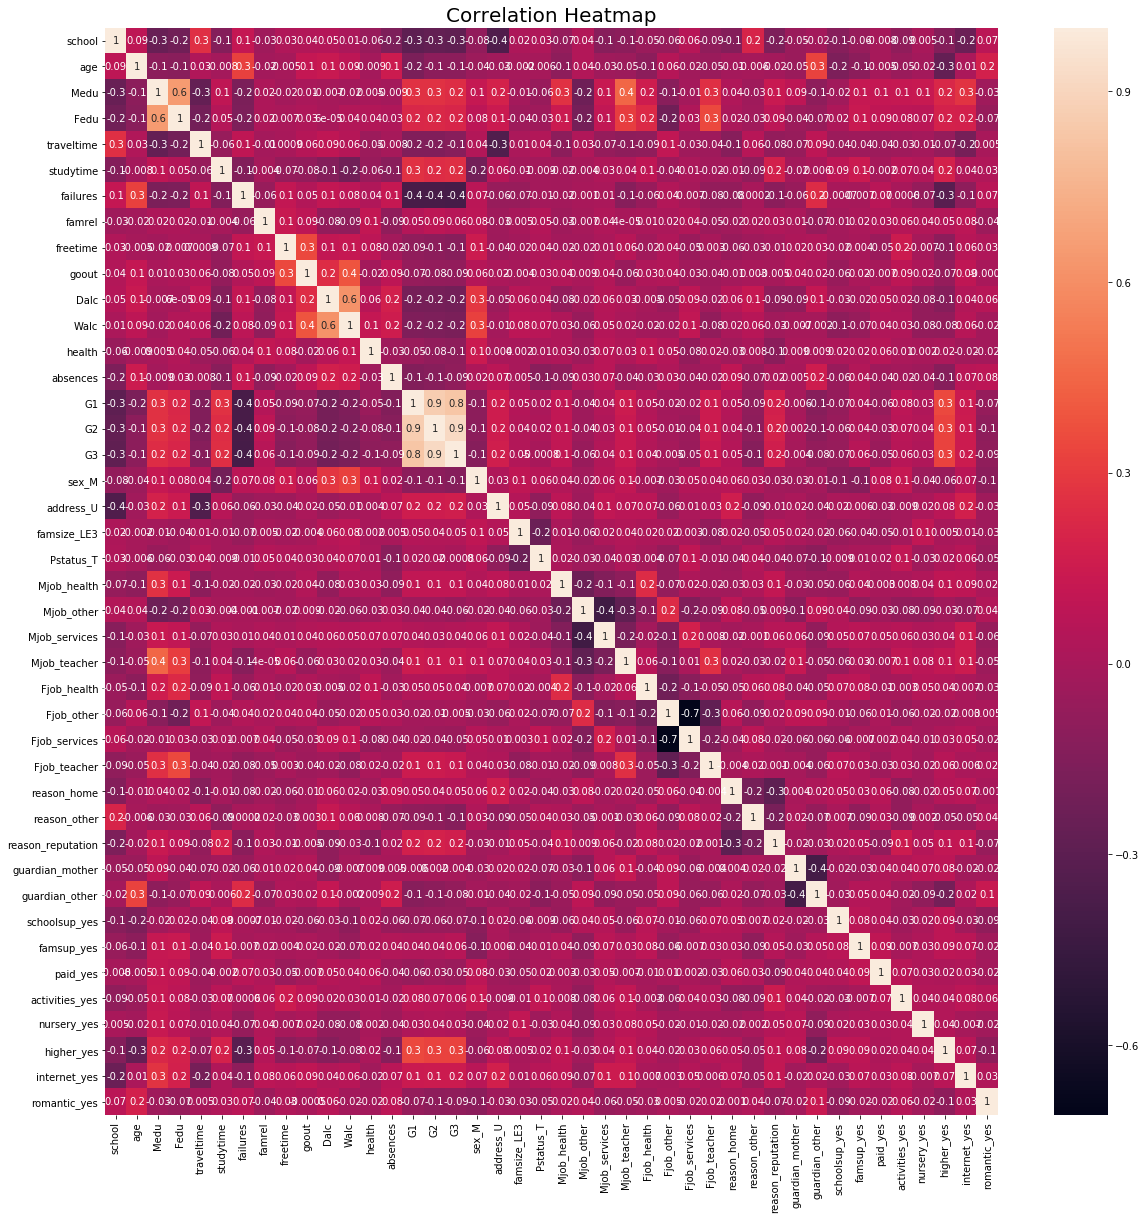

In [21]:
corr = df_por.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt='.1g')
plt.title('Correlation Heatmap', fontsize=20)
plt.savefig('heatmap.jpg')
plt.show()

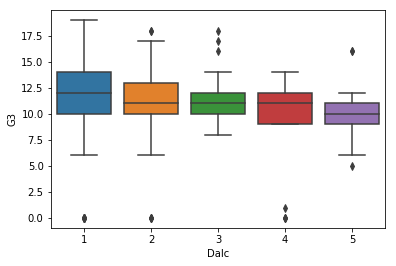

In [20]:
sns.boxplot(x='Dalc', y='G3', data=df_por)

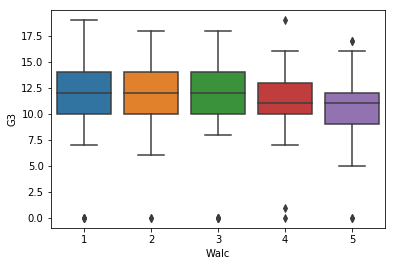

In [22]:
sns.boxplot(x='Walc', y='G3', data=df_por)

In [23]:
df_por.head()

,school,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,0,18,4,4,2,2,0,4,3,4,...,1,0,1,0,0,0,1,1,0,0
1,0,17,1,1,1,2,0,5,3,3,...,0,0,0,1,0,0,0,1,1,0
2,0,15,1,1,1,2,0,4,3,2,...,1,0,1,0,0,0,1,1,1,0
3,0,15,4,2,1,3,0,3,2,2,...,1,0,0,1,0,1,1,1,1,1
4,0,16,3,3,1,2,0,4,3,2,...,0,0,0,1,0,0,1,1,0,0


In [24]:
def result(score):
    new=[]
    for i in score:
        if (i<8):
            i=0     #Student fails
        else:
            i=1     #student passes
        new.append(i)
    return new
df_por['G3']=result(df_por['G3'])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_por.drop(['G1','G2','G3'],axis=1), df_por['G3'], test_size=0.33, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
regressor = LogisticRegression() 

In [28]:
regressor.fit(X_train,y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
regressor.score(X_test,y_test)

0.958139534883721

In [30]:
regressor.score(X_train,y_train)

0.9631336405529954